In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("FullData.csv")
data.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [3]:
data.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

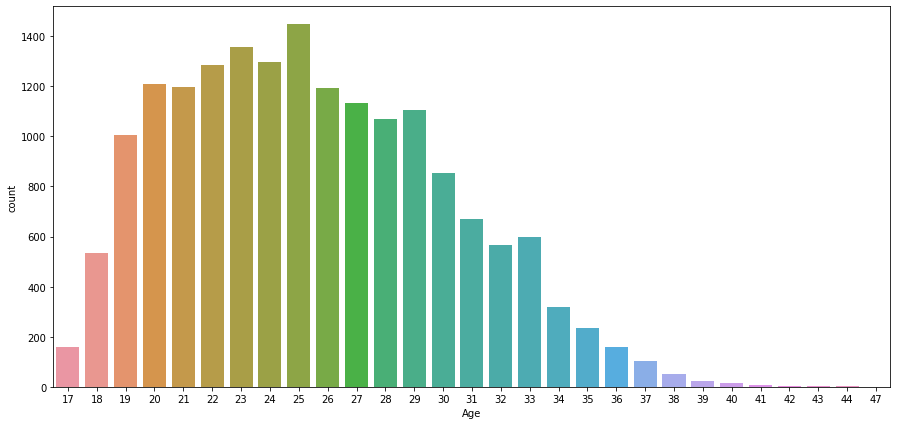

In [4]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=data)

Let's find out the best GK in the world

In [5]:
a = 1
b = 2
c = 3 
d = 4 

data['shot_stopping_gk'] = (d*data.GK_Positioning+c*data.GK_Diving+a*data.GK_Kicking+a*data.GK_Handling+b*data.Composure+c*data.Jumping)/(1*d+2*c+2*a+1*b)
data['sweeper_gk'] = (c*data.GK_Positioning+b*data.GK_Diving+d*data.GK_Kicking+c*data.GK_Handling+c*data.Composure+c*data.Jumping)/(1*d+4*c+1*b)

Text(0, 0.5, 'Shot Stopping Score')

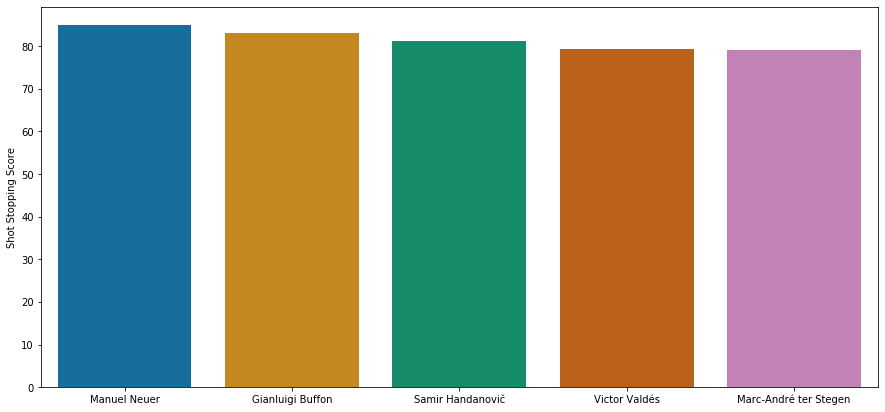

In [6]:
plt.figure(figsize=(15,7))

ssg = data.sort_values(by='shot_stopping_gk',ascending=False).head(5)
x1 = np.array(list(ssg['Name']))
y1 = np.array(list(ssg['shot_stopping_gk']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Text(0, 0.5, 'Sweeping Score')

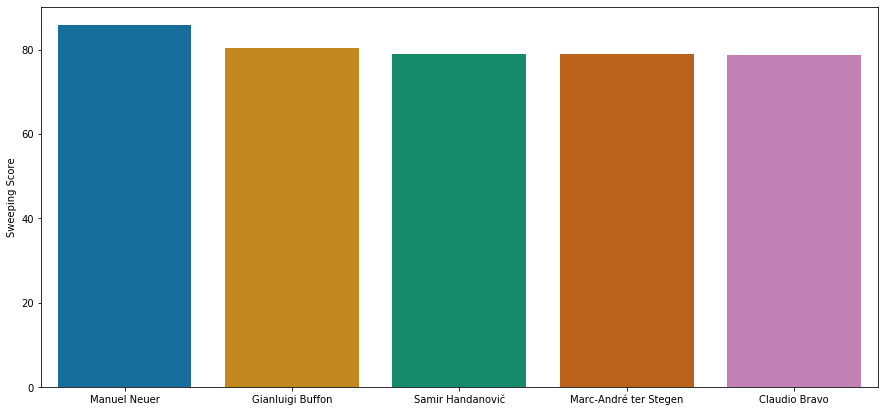

In [7]:
plt.figure(figsize=(15,7))

ssg = data.sort_values(by='sweeper_gk',ascending=False).head(5)
x1 = np.array(list(ssg['Name']))
y1 = np.array(list(ssg['sweeper_gk']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Sweeping Score")

In [8]:
data.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'shot_stopping_gk', 'sweeper_gk'],
      dtype='object')

Hurray🥳🥳🥳!!!! We got our best GK i.e. German Wall Manuel Neuer.

How about we put some best some CBs in front of Neuer to help him out!!!

In [9]:
data['centre_backs'] = ( d*data.Reactions + c*data.Interceptions + d*data.Sliding_Tackle + d*data.Standing_Tackle + b*data.Vision+ b*data.Composure + b*data.Crossing +a*data.Short_Pass + b*data.Long_Pass+ c*data.Acceleration + b*data.Speed+ d*data.Stamina + d*data.Jumping + d*data.Heading + b*data.Long_Shots + d*data.Marking + c*data.Aggression)/(6*b + 3*c + 7*d)

Text(0, 0.5, 'Left Centre Backs Score')

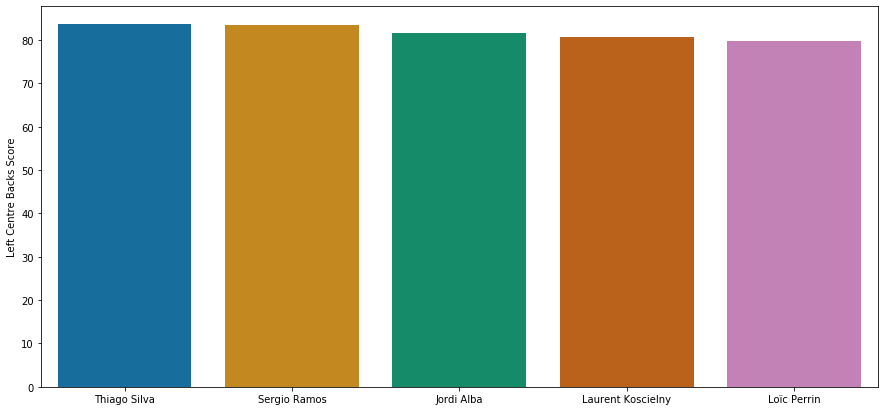

In [10]:
plt.figure(figsize=(15,7))

left_cb = data[(data['Club_Position']=='LCB')].sort_values(by='centre_backs',ascending=False).head(5)
x1 = np.array(list(left_cb['Name']))
y1 = np.array(list(left_cb['centre_backs']))
sns.barplot(x1,y1,palette='colorblind')
plt.ylabel('Left Centre Backs Score')


Text(0, 0.5, 'Right Centre Backs Score')

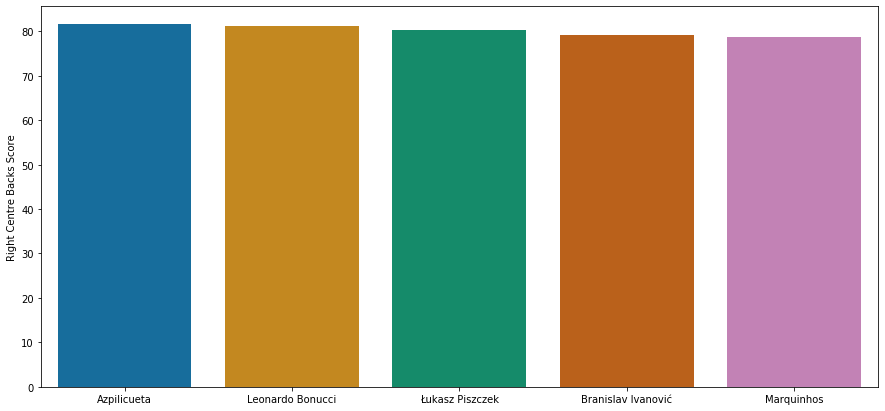

In [11]:
plt.figure(figsize=(15,7))

right_cb = data[(data['Club_Position']=='RCB')].sort_values(by='centre_backs',ascending=False).head(5)
x2 = np.array(list(right_cb['Name']))
y2 = np.array(list(right_cb['centre_backs']))
sns.barplot(x2,y2,palette='colorblind')
plt.ylabel('Right Centre Backs Score')

Azpilicueta and Ramos CB Pairing 🤮🤮🤮🤮🤮

In [12]:
data['full_backs'] = ( d*data.Reactions + c*data.Interceptions + d*data.Sliding_Tackle + d*data.Standing_Tackle + b*data.Vision+ b*data.Composure + b*data.Crossing +a*data.Short_Pass + b*data.Long_Pass+ c*data.Acceleration + b*data.Speed+ d*data.Stamina + d*data.Jumping + d*data.Heading + b*data.Long_Shots + d*data.Marking + c*data.Aggression)/(6*b + 3*c + 7*d)

In [13]:
data['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

['Philipp Lahm' 'Kyle Walker' 'Stephan Lichtsteiner' 'Antonio Valencia'
 'Bacary Sagna']


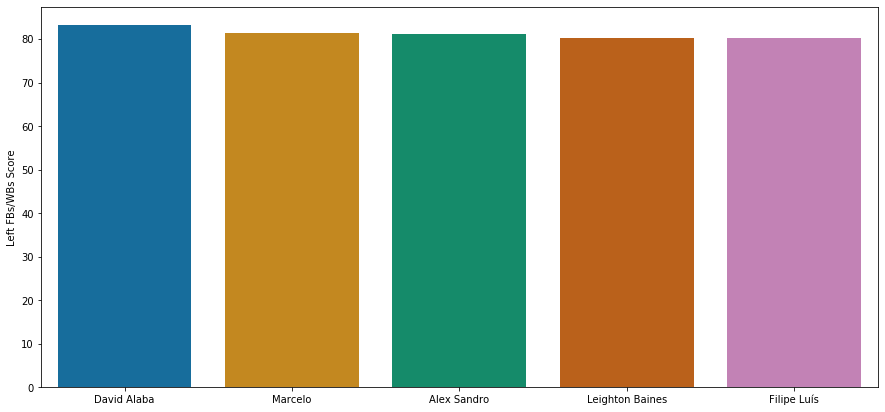

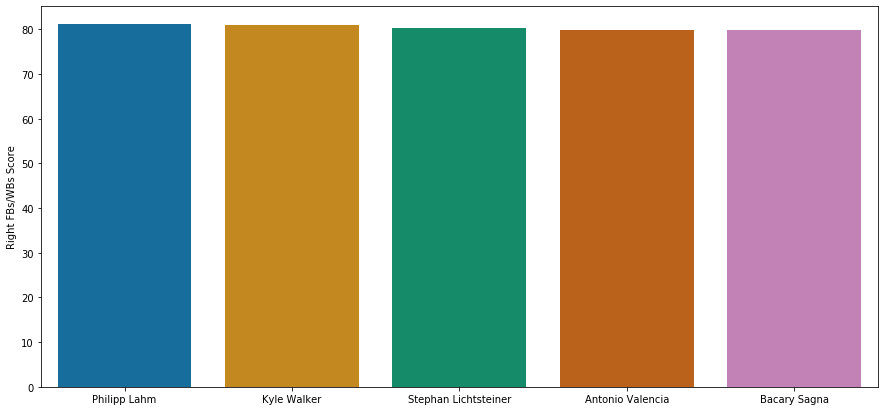

In [14]:
plt.figure(figsize=(15,7))

left_full_back = data[(data['Club_Position'] == 'LB') | (data['Club_Position'] == 'LWB')].sort_values(by='full_backs',ascending=False).head(5)
x1 = np.array(list(left_full_back['Name']))
y1 = np.array(list(left_full_back['full_backs']))
sns.barplot(x1,y1,palette='colorblind')
plt.ylabel("Left FBs/WBs Score")

plt.figure(figsize=(15,7))
right_full_back = data[(data['Club_Position'] == 'RB') | (data['Club_Position'] == 'RWB')].sort_values(by='full_backs',ascending=False).head(5)
x2 = np.array(list(right_full_back['Name']))
y2 = np.array(list(right_full_back['full_backs']))
sns.barplot(x2,y2,palette='colorblind')
plt.ylabel("Right FBs/WBs Score")
print(x2)

Alaba is fine but Lahm RIP my defence 😪😪😪

Defence is trash but let's hope i can put a quality midfield.

In [15]:
data.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'shot_stopping_gk', 'sweeper_gk', 'centre_backs',
       'full_backs'],
      dtype='object')

In [27]:
data['defensive_mid'] = ( d*data.Agility + c*data.Ball_Control + b*data.Vision + c*data.Short_Pass + a*data.Long_Pass + c*data.Acceleration + b*data.Speed + d*data.Stamina + c*data.Strength + d*data.Marking + c*data.Aggression + b*data.Balance)/(1*a + 3*b + 5*c + 3*d) 
data['centre_mid'] = (c*data.Ball_Control + c*data.Dribbling + a*data.Attacking_Position + b*data.Vision + b*data.Composure + d*data.Short_Pass + c*data.Long_Pass + c*data.Balance + a*data.Crossing + b*data.Stamina)/(1*d + 4*c + 3*b + 1*a)
data['attacking_mid'] = (b*data.Ball_Control + c*data.Dribbling + d*data.Attacking_Position + d*data.Vision + b*data.Composure + c*data.Balance + b*data.Crossing + b*data.Short_Pass + a*data.Long_Pass + c*data.Stamina + b*data.Strength + b*data.Finishing + b*data.Freekick_Accuracy)/(7*b + 3*c + 2*d + 1*a)

Text(0, 0.5, 'Centre Attacking Mids Score')

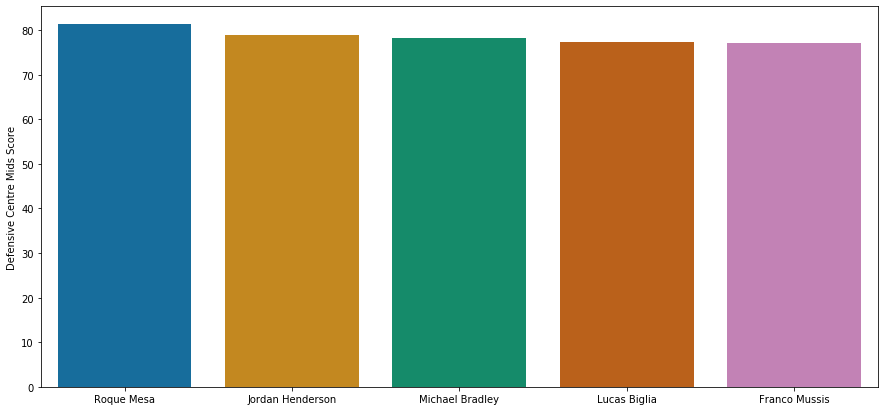

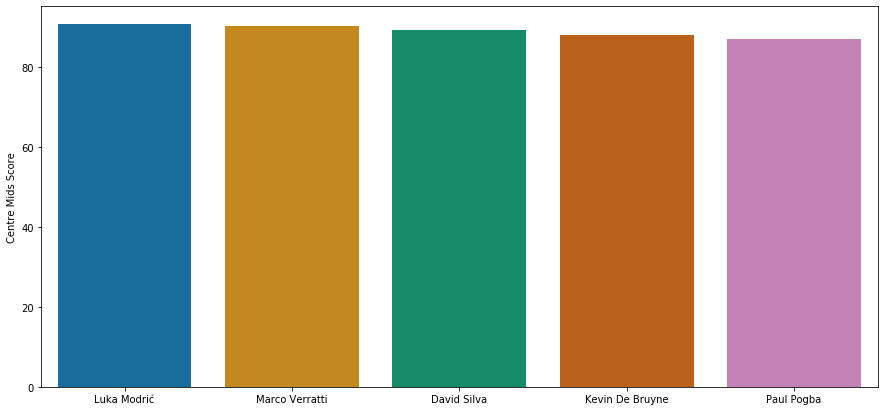

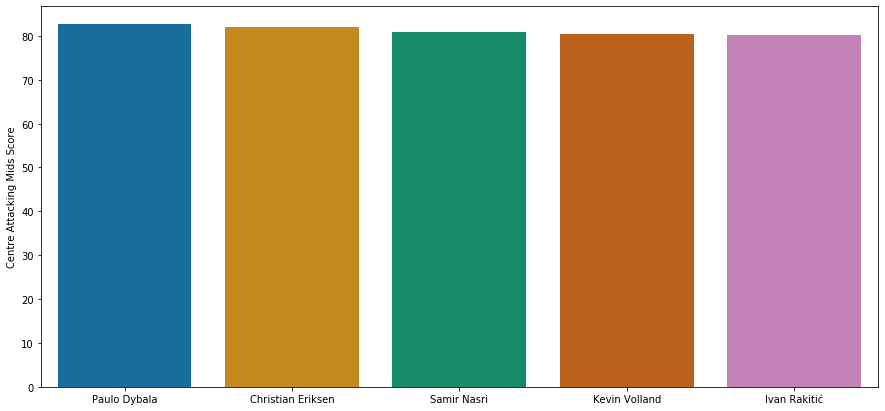

In [28]:
plt.figure(figsize=(15,7))

CDM = data[(data['Club_Position'] == 'CDM')].sort_values(by='defensive_mid',ascending=False).head(5)
#CDM
x1 = np.array(list(CDM['Name']))
y1 = np.array(list(CDM['defensive_mid']))
sns.barplot(x1,y1,palette='colorblind')
plt.ylabel('Defensive Centre Mids Score')

plt.figure(figsize=(15,7))

CM = data[(data['Club_Position'] == 'RCM') | (data['Club_Position'] == 'LCM')].sort_values(by='centre_mid',ascending=False).head(5)
#CM
x2 = np.array(list(CM['Name']))
y2 = np.array(list(CM['centre_mid']))
sns.barplot(x2,y2,palette='colorblind')
plt.ylabel('Centre Mids Score')

plt.figure(figsize=(15,7))

CAM = data[(data['Club_Position'] == 'CAM')].sort_values(by='attacking_mid',ascending=False).head(5)
#CAM
x3 = np.array(list(CAM['Name']))
y3 = np.array(list(CAM['attacking_mid']))
sns.barplot(x3,y3,palette='colorblind')
plt.ylabel('Centre Attacking Mids Score')

Mesa is ass but Modric and Dybala 🤤🤤🤑🤑🤤🤤

In [30]:
data.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'shot_stopping_gk', 'sweeper_gk', 'centre_backs',
       'full_backs', 'defensive_mid', 'centre_mid', 'attacking_mid'],
      dtype='object')

In [32]:
data['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [40]:
data['left_winger'] = (a*data.Ball_Control + d*data.Dribbling + c*data.Crossing + b*data.Reactions + b*data.Vision + c*data.Speed + c*data.Stamina + b*data.Balance + c*data.Acceleration + a*data.Heading + d*data.Shot_Power + d* data.Finishing + c*data.Long_Shots + b*data.Freekick_Accuracy + c*data.Penalties + b*data.Volleys)/(5*b + 6*c + 3*d + 2*a)
data['right_winger'] = (b*data.Ball_Control + d*data.Dribbling + c*data.Crossing + b*data.Reactions + b*data.Vision + c*data.Speed + c*data.Stamina + b*data.Balance + c*data.Acceleration + a*data.Heading + d*data.Shot_Power + d* data.Finishing + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Penalties + b*data.Volleys)/(6*b + 5*c + 4*d + 1*a)
data['strikers'] = (b*data.Ball_Control + b*data.Dribbling + b*data.Crossing + d*data.Reactions + a*data.Vision + b*data.Speed + c*data.Stamina + c*data.Balance + a*data.Acceleration + d*data.Heading + d*data.Shot_Power + d* data.Finishing + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Penalties + b*data.Volleys)/(6*b + 3*c + 5*d + 1*a)

Text(0, 0.5, 'Strikers Score')

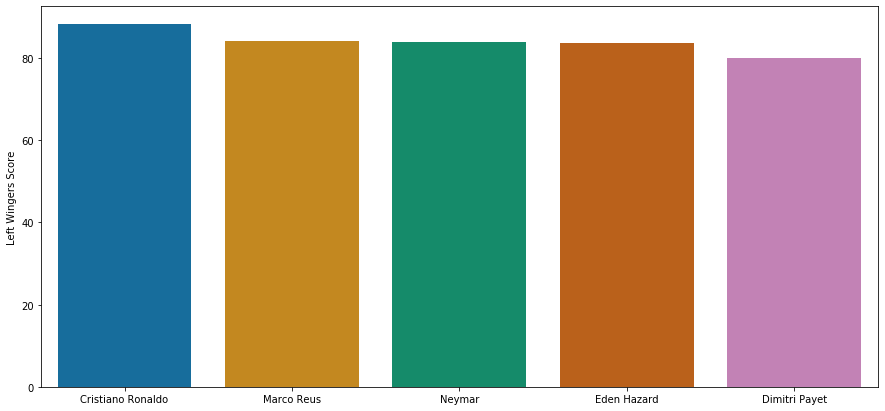

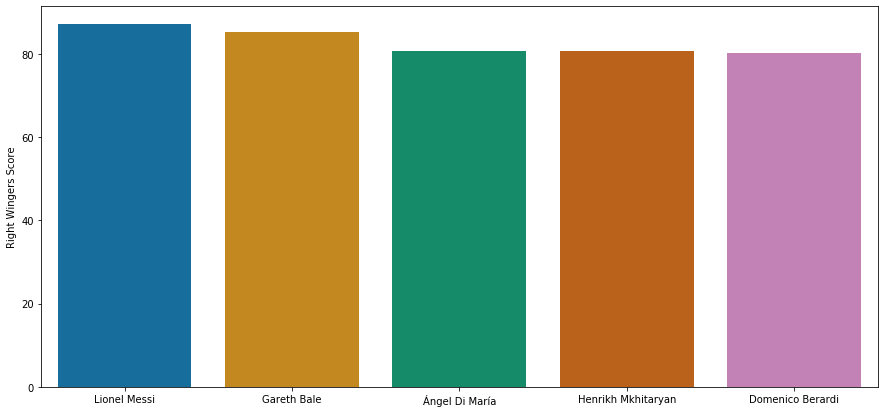

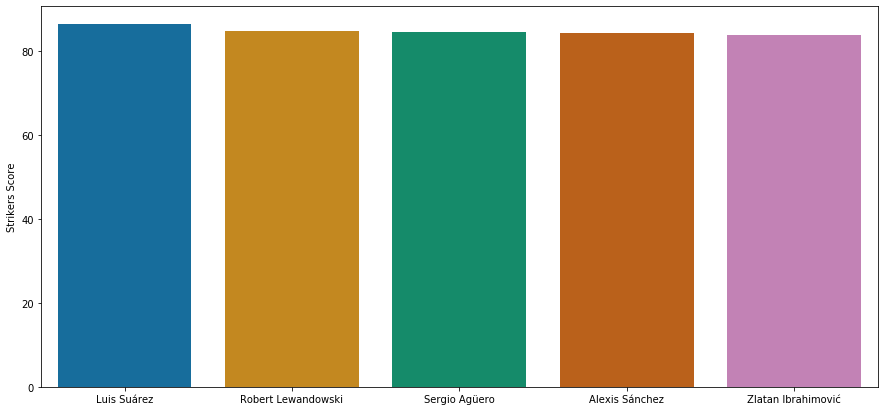

In [42]:
plt.figure(figsize=(15,7))

LW = data[(data['Club_Position'] == 'LW') | (data['Club_Position'] == 'LF')].sort_values(by='left_winger',ascending=False).head(5)
x1 = np.array(list(LW['Name']))
y1 = np.array(list(LW['left_winger']))
sns.barplot(x1,y1,palette='colorblind')
plt.ylabel('Left Wingers Score')


plt.figure(figsize=(15,7))

RW = data[(data['Club_Position'] == 'RW') | (data['Club_Position'] == 'RF')].sort_values(by='right_winger',ascending=False).head(5)
x2 = np.array(list(RW['Name']))
y2 = np.array(list(RW['right_winger']))
sns.barplot(x2,y2,palette='colorblind')
plt.ylabel('Right Wingers Score')

plt.figure(figsize=(15,7))

ST = data[(data['Club_Position'] == 'CF') | (data['Club_Position'] == 'ST')].sort_values(by='strikers',ascending=False).head(5)
x3 = np.array(list(ST['Name']))
y3 = np.array(list(ST['strikers']))
sns.barplot(x3,y3,palette='colorblind')
plt.ylabel('Strikers Score')

Two GOATs on wings and Luis Suarez at #9 🥶🥶🥶 R.I.P. Opposite team defences

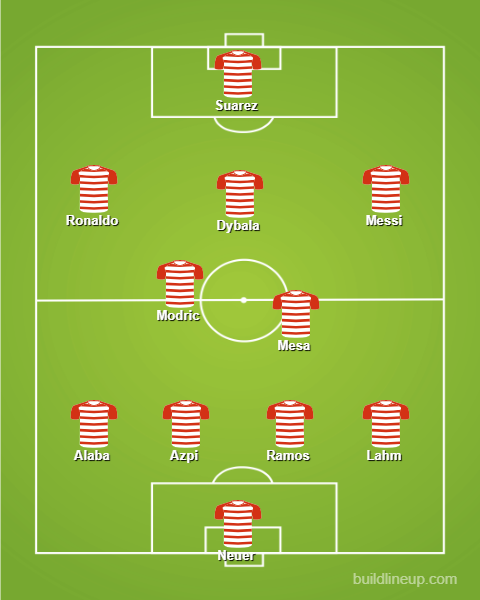